#  Textmining on facebook-Posts

This notebook is a showcase how to pull data out of facebook via the graph API and how to analyze the posts with standard NLP libraries in Python. As an example, we concentrated ourselves on posts on facebook.com/deutschewellenews by Deutsche Welle, which is a public german news organization concentrating on international topics for international users.

This project was part of the fjp Hackathon 06/12/2017 in Hamburg.

LINKS:

* https://www.facebook.com/groups/FJPHackathonHamburg/
* https://www.facebook.com/deutschewellenews
* https://developers.facebook.com/docs/graph-api

NOTE: this notebook represents the coding status at the hackathon. It was not cleaned in a proper way or written in beautiful code. This was done on purpose to show how a 'hacky' solution might look like.

## Getting the Data 

We use the Graph API to get the data via GET-Requests. An alternative we've tried was to use the official facebook-sdk for python, which was quite buggy. 

In [77]:
import json
import pandas as pd
import numpy as np

In [1]:
### Imports

import requests
import json
from pprint import pprint
from datetime import date
from datetime import datetime
from datetime import timedelta

We deleted the facebook page id and the token for privacy reasons.

In [2]:
### Here you should place your id-Information

page_id = '111111111'
token = '111111111111111111|08gadf8haf8r8afd9g8dfd987dfa'

In [7]:
feed = requests.get('https://graph.facebook.com/v2.9/' + page_id + '/posts?access_token=' + token + '&limit=100&fields=message,id,from,type,picture,link,created_time,updated_time')




posts = []
ninety_days = timedelta(days=90)
start_date = date.today() - ninety_days
feed_json = feed.json()
# print feed_json['paging']['next']



posts = feed_json['data']
# start_date needs a time also
start_date = datetime.combine(start_date, datetime.min.time())
pprint(start_date)
pprint(feed_json['data'][-1]['created_time'])
pprint(datetime.parse(posts['data'][-1]['created_time']))

last_date = datetime.combine(date.today(), datetime.min.time())
while (last_date > start_date):
    last_date = datetime.strptime(feed_json['data'][-1]['created_time'][:-5], "%Y-%m-%dT%H:%M:%S" )
    pprint(last_date)
    feed = requests.get(feed_json['paging']['next'])
    feed_json = feed.json()
    posts += feed_json['data']
    #pprint(feed_json['data'][-1])
# pprint(posts)
    

In [249]:
df = pd.DataFrame(posts)

The data as a table.

In [250]:
df.head()

,created_time,from,id,link,message,picture,type,updated_time
0,2017-06-12T13:12:39+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944642344440,https://www.facebook.com/deutschewellenews/videos/10154944642344440/,A China Eastern flight bound for Shanghai had to fly back to Sydney for an emergency landing after an enormous hole tore through the plane's left engine 😲,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x130/19143516_10154944657439440_5282810667433197568_n.jpg?oh=2b82db853e939bce87a0497c1a7c33c2&oe=59E0F38C,video,2017-06-12T14:01:58+0000
1,2017-06-12T11:50:24+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944511439440,https://www.facebook.com/deutschewellenews/photos/a.10150647923819440.392236.24369314439/10154944510409440/?type=3,"Germany Decides: On the road to the elections\n\nSix cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? DW reporters Sumi Somaskanda and Nina Ha...",https://scontent.xx.fbcdn.net/v/t1.0-0/s130x130/19030594_10154944510409440_3964107228294447201_n.png?oh=fb82921ad021c8cb66db7b138a45a893&oe=59A623D7,photo,2017-06-12T12:19:53+0000
2,2017-06-12T11:09:00+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944432029440,http://www.dw.com/en/germanydecides-on-the-road-to-the-elections/a-39146595,"Six cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? Sumi Somaskanda and Nina Haase are hitting the road to find out. Tune in to our Facebook ...",https://scontent.xx.fbcdn.net/v/t45.1600-4/c10.0.130.130/p130x130/19033526_23842611865180222_9014843394584739840_n.png?oh=21a5ef57208a66d5c232821bc4d2b68a&oe=59A7B69B,link,2017-06-12T13:21:45+0000
3,2017-06-12T09:46:14+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944302089440,http://www.dw.com/en/russian-opposition-leader-alexei-navalny-to-lead-anti-kremlin-russia-day-protests/a-39205818?maca=en-Facebook-dw,UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti-Kremlin protests. Supporters of Putin-critic Navalny are expected to mark Monday's public holiday with over 200 rallies nati...,https://scontent.xx.fbcdn.net/v/t39.2147-6/c8.0.130.130/p130x130/18928736_10154944299234440_2331183101511729152_n.jpg?oh=8822a15e24588e2d03f1c1701889d1d5&oe=59DFFBA7,link,2017-06-12T13:34:39+0000
4,2017-06-12T08:39:39+0000,"{u'name': u'DW News', u'id': u'24369314439'}",24369314439_10154944182269440,http://www.dw.com/en/top-stories/german-elections/s-100649?maca=en-Facebook-dw,For all of our coverage in the run-up to the German election visit www.dw.com/germanelections and follow the hashtag #GermanyDecides.,https://scontent.xx.fbcdn.net/v/t45.1600-4/c50.0.130.130/p130x130/19033224_23842611730470222_910704118119530496_n.png?oh=e6ae89d84d9a029be67a373072baa644&oe=59A45342,link,2017-06-12T13:41:52+0000


The shape of the data.

In [251]:
df.shape

(2100, 8)

Save the datetime.

In [252]:
df['time'] = pd.to_datetime(df.created_time)

# Named Entity Recognition 

We use a combination of spacy and geotext for Named Entity Recognition and Location Information.

Spacy: 
https://spacy.io/
Geotext:
https://pypi.python.org/pypi/geotext

In [10]:
import spacy
nlp = spacy.load('en')


In [29]:
import re

In [256]:
# clean the text

def preprocess_text(text):
    out = text
    try:
        out = text.replace(u"'s", u"")
        out = out.replace(u"-", u" ")
    except:
        pass
    return out

In [258]:
# extract named entities

def get_named_entities(text):
    out = []
    try:
        doc = nlp(text)
        out = [{'label':ent.label_, 'text':ent.text} for ent in doc.ents]
    except:
        pass
    return out

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
created_time    2100 non-null object
from            2100 non-null object
id              2100 non-null object
link            2099 non-null object
message         2089 non-null object
picture         2099 non-null object
type            2100 non-null object
updated_time    2100 non-null object
time            2100 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 147.7+ KB


Get Entities

In [259]:
# apply functions from above

df['cleaned_text'] = df.message.apply(preprocess_text)
df['named_entities'] = df.cleaned_text.apply(get_named_entities)

In [147]:
pd.options.display.max_colwidth=200

Control the named entity recognition.

In [283]:
df[['cleaned_text', 'named_entities']].head(30)

,cleaned_text,named_entities
0,A China Eastern flight bound for Shanghai had to fly back to Sydney for an emergency landing after an enormous hole tore through the plane left engine 😲,"[{u'text': u'China', u'label': u'GPE'}, {u'text': u'Shanghai', u'label': u'GPE'}, {u'text': u'Sydney', u'label': u'GPE'}]"
1,"Germany Decides: On the road to the elections\n\nSix cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? DW reporters Sumi Somaskanda and Nina Ha...","[{u'text': u' ', u'label': u'CARDINAL'}, {u'text': u'Six', u'label': u'CARDINAL'}, {u'text': u'two', u'label': u'CARDINAL'}, {u'text': u'one', u'label': u'CARDINAL'}, {u'text': u'Germans', u'labe..."
2,"Six cities, two reporters, one question: What matters most to Germans ahead of the 2017 federal elections? Sumi Somaskanda and Nina Haase are hitting the road to find out. Tune in to our Facebook ...","[{u'text': u'Six', u'label': u'CARDINAL'}, {u'text': u'two', u'label': u'CARDINAL'}, {u'text': u'one', u'label': u'CARDINAL'}, {u'text': u'Germans', u'label': u'NORP'}, {u'text': u'2017', u'label'..."
3,UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti Kremlin protests. Supporters of Putin critic Navalny are expected to mark Monday public holiday with over 200 rallies nation...,"[{u'text': u'Russian', u'label': u'NORP'}, {u'text': u'Alexei Navalny', u'label': u'PERSON'}, {u'text': u'Kremlin', u'label': u'ORG'}, {u'text': u'Putin', u'label': u'GPE'}, {u'text': u'Navalny', ..."
4,For all of our coverage in the run up to the German election visit www.dw.com/germanelections and follow the hashtag #GermanyDecides.,"[{u'text': u'German', u'label': u'NORP'}, {u'text': u'GermanyDecides', u'label': u'ORG'}]"
5,"Cheering, hundreds entered the EU in what President Poroshenko called a symbolic ""final breakaway"" from Moscow.","[{u'text': u'hundreds', u'label': u'CARDINAL'}, {u'text': u'EU', u'label': u'ORG'}, {u'text': u'Poroshenko', u'label': u'PERSON'}, {u'text': u'Moscow', u'label': u'GPE'}]"
6,UK PM Theresa May plan to recruit Northern Ireland backers to stay in power has raised concerns in Dublin. Her cabinet reshuffle may signal a more open stance on Brexit talks with Europe.,"[{u'text': u'UK', u'label': u'GPE'}, {u'text': u'Theresa', u'label': u'PERSON'}, {u'text': u'Northern Ireland', u'label': u'LOC'}, {u'text': u'Dublin', u'label': u'GPE'}, {u'text': u'Brexit', u'la..."
7,The first bicycle ride took place 200 years ago.\n\nAny idea where? 🚲,"[{u'text': u'first', u'label': u'ORDINAL'}, {u'text': u'200 years ago', u'label': u'DATE'}]"
8,Foreigners released from prison in Peru aren't always free to leave the country; it takes them more than six months to get their exit papers and leaves them prone to more problems.,"[{u'text': u'Peru', u'label': u'GPE'}, {u'text': u'more than six months', u'label': u'DATE'}]"
9,Preliminary results have shown French President Emmanuel Macron political startup well ahead of traditional parties with over 30 percent in the first round of voting. The center right Republicans ...,"[{u'text': u'French', u'label': u'NORP'}, {u'text': u'Emmanuel Macron', u'label': u'PERSON'}, {u'text': u'over 30 percent', u'label': u'PERCENT'}, {u'text': u'first', u'label': u'ORDINAL'}, {u'tex..."


Get Persons

In [263]:
df['Persons'] = df.named_entities.apply(lambda x: [ne['text'] for ne in x if ne['label'] == 'PERSON'])

Get Locations

In [265]:
from geotext import GeoText
import pycountry

In [266]:
places = GeoText(df.cleaned_text[0])
print places.cities
# "London"

print GeoText('French').country_mentions.keys()


[u'Shanghai', u'Sydney']
['FR']


In [267]:
df.cleaned_text[0]

u'A China Eastern flight bound for Shanghai had to fly back to Sydney for an emergency landing after an enormous hole tore through the plane left engine \U0001f632'

In [268]:
df.cleaned_text[3]

u'UPDATE: Russian opposition leader Alexei Navalny arrested ahead of anti Kremlin protests. Supporters of Putin critic Navalny are expected to mark Monday public holiday with over 200 rallies nationwide.'

Extract the mentioned Countries and Cities from the surfaceforms provided by Spacy.

In [269]:
def countries_from_nes(ne_list):
    cities = []
    countries = []
    for ne in ne_list:
        if ne['label'] in ['NORP', 'LOC', 'GPE']:
            places = GeoText(ne['text'])
            cities = cities + places.cities
            countries = countries + places.country_mentions.keys()
    return cities, countries

In [270]:
cities = []
countries = []
for ne in df.named_entities:
    cities_plus, countries_plus = countries_from_nes(ne)
    cities = cities + cities_plus
    countries = countries + countries_plus

Save the information to alpha3-country-keys for usage within datawrapper and d3.js

In [274]:
def alpha2_to_alpha3(old_key):
    if old_key == "XK":
        new_key = "RKS"
        name = 'Kosovo'
    else:
        country = pycountry.countries.get(alpha_2=old_key)
        new_key = country.alpha_3
        name = country.name
    return new_key, name

In [299]:
countries_new = []
country_names = []
for c in countries:
    a3, name = alpha2_to_alpha3(c)
    countries_new.append(a3)
    country_names.append(name)
print countries_new

[u'CHN', u'CHN', u'CAN', u'DEU', u'RUS', u'DEU', u'USA', u'USA', u'PER', u'FRA', u'DEU', u'MAR', u'JOR', u'DEU', u'QAT', u'RUS', 'RKS', u'HKG', u'CHN', u'USA', u'DEU', u'ITA', u'DEU', u'CHN', u'FIN', u'IND', u'PAK', u'RUS', u'DEU', u'DEU', u'ESP', u'GEO', u'DEU', u'JOR', u'GBR', u'LUX', u'EST', u'USA', u'GBR', u'DEU', u'GBR', u'GBR', u'RUS', u'EGY', u'EGY', u'SYR', u'ISR', u'USA', u'ISR', u'DEU', u'DEU', u'IRQ', u'CHN', u'DEU', u'GBR', u'ISR', u'PSE', u'ISR', u'ISR', u'PSE', u'RUS', u'QAT', u'ISR', u'TUR', u'JOR', u'QAT', u'AFG', u'DEU', u'PAK', u'GBR', u'PAK', u'GBR', u'USA', u'BRA', u'QAT', u'QAT', u'IRN', u'TUR', u'CZE', u'CHN', u'QAT', u'IND', u'QAT', u'DEU', u'DEU', u'DEU', u'CAN', u'RUS', u'IND', u'USA', u'VEN', u'USA', u'MEX', u'MEX', u'GBR', u'GBR', u'PAK', u'LBY', u'MAR', u'ISR', u'DEU', u'DEU', u'DEU', u'SAU', u'BHR', u'EGY', u'YEM', u'AFG', u'AFG', u'DEU', u'TUR', u'ISR', u'DEU', u'GBR', u'USA', u'BGR', u'RUS', u'LTU', u'TWN', u'CHN', u'CHN', u'DEU', u'DEU', u'JPN', u'PRK', 

In [276]:
len(country_names)

1489

In [277]:
len(countries_new)

1489

In [278]:
country_names

[u'China',
 u'China',
 u'Canada',
 u'Germany',
 u'Russian Federation',
 u'Germany',
 u'United States',
 u'United States',
 u'Peru',
 u'France',
 u'Germany',
 u'Morocco',
 u'Jordan',
 u'Germany',
 u'Qatar',
 u'Russian Federation',
 'Kosovo',
 u'Hong Kong',
 u'China',
 u'United States',
 u'Germany',
 u'Italy',
 u'Germany',
 u'China',
 u'Finland',
 u'India',
 u'Pakistan',
 u'Russian Federation',
 u'Germany',
 u'Germany',
 u'Spain',
 u'Georgia',
 u'Germany',
 u'Jordan',
 u'United Kingdom',
 u'Luxembourg',
 u'Estonia',
 u'United States',
 u'United Kingdom',
 u'Germany',
 u'United Kingdom',
 u'United Kingdom',
 u'Russian Federation',
 u'Egypt',
 u'Egypt',
 u'Syrian Arab Republic',
 u'Israel',
 u'United States',
 u'Israel',
 u'Germany',
 u'Germany',
 u'Iraq',
 u'China',
 u'Germany',
 u'United Kingdom',
 u'Israel',
 u'Palestine, State of',
 u'Israel',
 u'Israel',
 u'Palestine, State of',
 u'Russian Federation',
 u'Qatar',
 u'Israel',
 u'Turkey',
 u'Jordan',
 u'Qatar',
 u'Afghanistan',
 u'Germa

Save the data as a csv using pandas dataframes

In [300]:
df_countries = pd.DataFrame(Counter(countries_new).most_common())
df_countries.columns = ['a3', 'number']
df_countries.head()

,a3,number
0,DEU,348
1,USA,112
2,TUR,109
3,RUS,77
4,FRA,75


In [286]:
df_countries_2 = pd.DataFrame(Counter(country_names).most_common())
df_countries_2.columns = ['name', 'number']
df_countries_2.head()

,name,number
0,Germany,348
1,United States,112
2,Turkey,109
3,Russian Federation,77
4,France,75


In [287]:
df_countries = pd.merge(df_countries, df_countries_2, how='inner')
df_countries.head()

,a3,number,name
0,DEU,348,Germany
1,USA,112,United States
2,TUR,109,Turkey
3,RUS,77,Russian Federation
4,FRA,75,France


In [288]:
df_countries.columns = ['id', 'population', 'name']

In [292]:
df_cities = pd.DataFrame(Counter(cities).most_common())
df_cities.columns = ['city', 'number']
df_cities.head()

,city,number
0,Berlin,43
1,London,19
2,Paris,18
3,Pyongyang,16
4,Washington,13


In [295]:
df_cities.drop_duplicates(inplace=True)

In [302]:
df_countries.to_csv('countries.csv', index=False, encoding='utf-8')

# Barplots of persons, cities 

In [310]:
import seaborn as sns
from matplotlib import pyplot as plt

In [327]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("dark"))

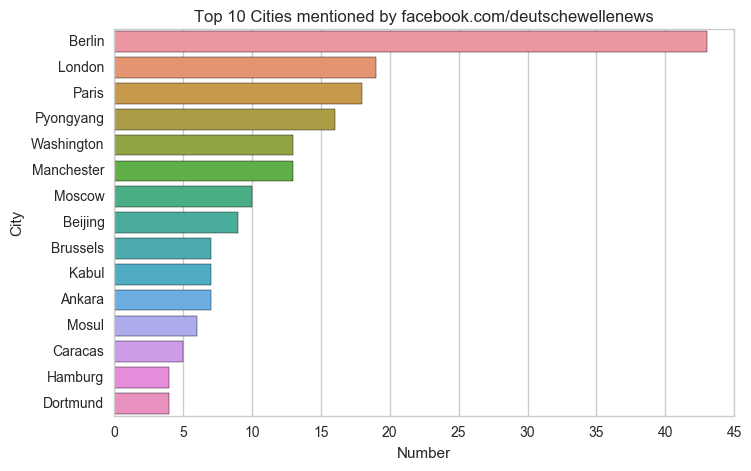

In [328]:
%matplotlib inline

plt.figure(figsize=(8,5))
ax = sns.barplot(x="number", y="city", data=df_cities.head(15))
ax.set_title('Top 10 Cities mentioned by facebook.com/deutschewellenews')
ax.set_xlabel('Number')
ax.set_ylabel('City')

In [304]:
df_cities.tail(5)

,city,number
91,Prague,1
92,Lagos,1
93,Amsterdam,1
94,Michigan,1
95,Warsaw,1


In [373]:
persons = df.Persons.tolist()
persons = [item for sublist in persons for item in sublist]
persons_out = []
for per in persons:
    if per in [u'Trump', u'Donald Trump']:
        per = u'Donald J. Trump'
    elif per == u'Merkel':
        per = u'Angela Merkel'
    elif per == u'Putin':
        per = u'Vladimir Putin'
    elif per == u'Erdogan':
        per = u'Recep Tayyip Erdoğan'
    elif per in [u'Brexit', u'Facebook']:
        per = None
    persons_out.append(per)
persons_out = [per for per in persons_out if per != None]

In [374]:
df_persons = pd.DataFrame(Counter(persons_out).most_common())
df_persons.columns = ['person', 'number']
df_persons.head()

,person,number
0,Donald J. Trump,119
1,Angela Merkel,57
2,Emmanuel Macron,30
3,Theresa May,18
4,Recep Tayyip Erdoğan,14


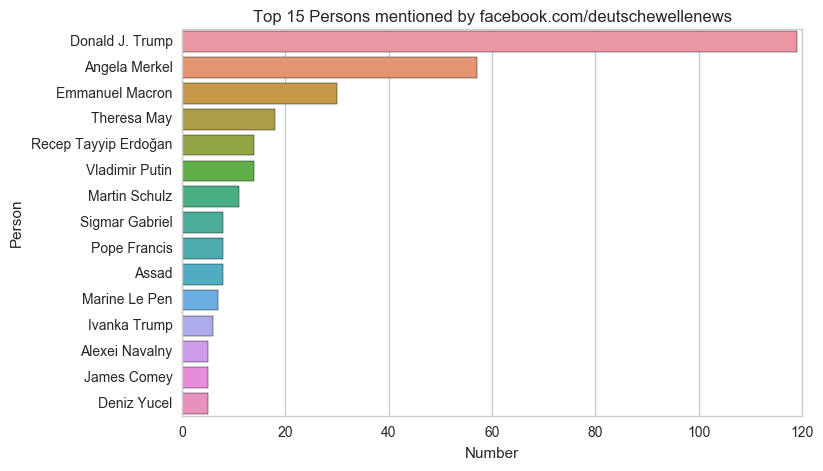

In [376]:

plt.figure(figsize=(8,5))
ax = sns.barplot(x="number", y="person", data=df_persons.head(15))
ax.set_title('Top 15 Persons mentioned by facebook.com/deutschewellenews')
ax.set_xlabel('Number')
ax.set_ylabel('Person')

In [382]:
df.index = df.time
counts = pd.DataFrame()
time_frame = '1D'
counts['facebook.com/deutschewellenews'] = df.resample(time_frame, how='count').message
counts.fillna(0,inplace=True)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


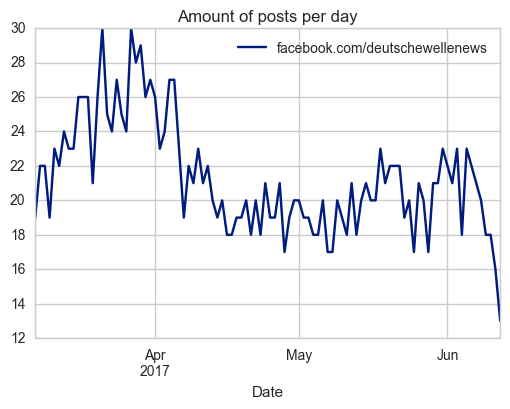

In [383]:
g = counts.plot(title="Amount of posts per day", grid = True, legend=False)
#g.set_xticklabels(counts_per_hour.index.day)
plt.legend(loc='best')
g.set_xlabel("Date")
plt.show()

Save country information as .csv (logarithmize the numbers)

In [386]:
import numpy as np

In [387]:
df_countries['log_number'] = np.log(df_countries.number)

In [394]:
def a3_to_name(a3):
    if a3 == "RKS":
        name = 'Kosovo'
    else:
        country = pycountry.countries.get(alpha_3=a3)
        name = country.name
    return name

In [395]:
df_countries['country'] = df_countries.a3.apply(a3_to_name)

In [396]:
df_countries.head(20)

,a3,number,log_number,country
0,DEU,348,5.852202,Germany
1,USA,112,4.718499,United States
2,TUR,109,4.691348,Turkey
3,RUS,77,4.343805,Russian Federation
4,FRA,75,4.317488,France
5,GBR,59,4.077537,United Kingdom
6,CHN,55,4.007333,China
7,SYR,49,3.891820,Syrian Arab Republic
8,PRK,43,3.761200,"Korea, Democratic People's Republic of"
9,ISR,35,3.555348,Israel


In [397]:
df_countries.to_csv('countries_log.csv', encoding='utf-8', index=False)